# Preprocessing, Feature Engineering, and Non-Linear Classifiers
In this lab we are going to train a classifier to predict which passengers survived the Titanic based on demographic information and travel details. 

This is a great dataset for learning the importance of feature engineering. Providing the model with informative features is critical to achieving high performance. 

First, we will try fitting some classifiers without doing any data engineering other than imputation and encoding categorical features. 

In the second half of the lab, you will engineer new features and hopefully gain an intuition on how we devise features that are informative to the ML task. 

We will also experiment with several models that you have been reviewing in class: LogisticRegression, RandomForest, XGBoost, SVC, NaiveBayes, and K-NN.

### Import the libraries

You may need to install `xgboost` if you do not already have it. Use the cells below to install packages in your local venv using `conda` or `pip`. In particular, sklearn must be >=1.2

This code generates two files:
- environment.yaml file specifies the Conda environment with the required packages and their versions.
    
    - The conda_env variable contains a YAML-formatted string that defines a Conda environment named ensf444 with Python version 3.10.13 and includes several packages.
- requirements.txt file specifies the Python packages and their versions for installation using pip.
which are used for managing the dependencies of a Python project. 

In [40]:
conda_env = '''\
name: ensf444
channels:
  - defaults
  - conda-forge
dependencies:
  - python=3.10.13
  - seaborn=0.13.*
  - matplotlib
  - pandas=2.*
  - numpy
  - scikit-learn=1.4.*
  - jupyter
  - kaggle
  - xgboost=1.7.*
'''
with open("environment.yaml", "w") as handle:
    handle.write(conda_env)

In [41]:
# pip requirements file
requirements = '''\
anyio==3.5.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.5
async-lru==2.0.4
attrs==23.1.0
Babel==2.11.0
beautifulsoup4==4.12.2
bleach==4.1.0
Bottleneck==1.3.5
Brotli==1.0.9
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==2.0.4
comm==0.1.2
contourpy==1.2.0
cryptography==41.0.7
cycler==0.11.0
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==0.8.3
fastjsonschema==2.16.2
fonttools==4.25.0
idna==3.4
ipykernel==6.28.0
ipython==8.20.0
ipywidgets==8.0.4
jedi==0.18.1
Jinja2==3.1.2
joblib==1.2.0
json5==0.9.6
jsonschema==4.19.2
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter_client==8.6.0
jupyter-console==6.6.3
jupyter_core==5.5.0
jupyter-events==0.8.0
jupyter-lsp==2.2.0
jupyter_server==2.10.0
jupyter_server_terminals==0.4.4
jupyterlab==4.0.8
jupyterlab-pygments==0.1.2
jupyterlab_server==2.25.1
jupyterlab-widgets==3.0.9
kaggle==1.6.5
kiwisolver==1.4.4
MarkupSafe==2.1.3
matplotlib==3.8.0
matplotlib-inline==0.1.6
mistune==2.0.4
mkl-fft==1.3.8
mkl-random==1.2.4
mkl-service==2.4.0
munkres==1.1.4
nbclient==0.8.0
nbconvert==7.10.0
nbformat==5.9.2
nest-asyncio==1.5.6
notebook==7.0.6
notebook_shim==0.2.3
numexpr==2.8.7
numpy==1.26.3
overrides==7.4.0
packaging==23.1
pandas==2.1.4
pandocfilters==1.5.0
parso==0.8.3
patsy==0.5.3
pexpect==4.8.0
Pillow==10.0.1
pip==23.3.1
platformdirs==3.10.0
ply==3.11
prometheus-client==0.14.1
prompt-toolkit==3.0.43
psutil==5.9.0
ptyprocess==0.7.0
pure-eval==0.2.2
pycparser==2.21
Pygments==2.15.1
pyOpenSSL==23.2.0
pyparsing==3.0.9
PyQt5==5.15.10
PyQt5-sip==12.13.0
PySocks==1.7.1
python-dateutil==2.8.2
python-json-logger==2.0.7
python-slugify==5.0.2
pytz==2023.3.post1
PyYAML==6.0.1
pyzmq==25.1.2
qtconsole==5.5.0
QtPy==2.4.1
referencing==0.30.2
requests==2.31.0
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.10.6
scikit-learn==1.4.1.post1
scipy==1.11.4
seaborn==0.13.1
Send2Trash==1.8.2
setuptools==68.2.2
sip==6.7.12
six==1.16.0
sniffio==1.3.0
soupsieve==2.5
stack-data==0.2.0
statsmodels==0.14.0
terminado==0.17.1
text-unidecode==1.3
threadpoolctl==2.2.0
tinycss2==1.2.1
tomli==2.0.1
tornado==6.3.3
tqdm==4.65.0
traitlets==5.7.1
typing_extensions==4.9.0
tzdata==2023.3
Unidecode==1.2.0
urllib3==1.26.18
wcwidth==0.2.5
webencodings==0.5.1
websocket-client==0.58.0
wheel==0.41.2
widgetsnbextension==4.0.5
xgboost==1.7.3
'''
with open("requirements.txt", "w") as handle:
    handle.write(requirements)

Following includes commented-out subprocess calls that can be used to update an existing Conda environment (conda env update) with the packages specified in environment.yaml, create a new Conda environment (conda env create) based on environment.yaml, or install the packages specified in requirements.txt using pip. These subprocess calls are provided as examples and need to be uncommented and executed based on your specific needs.

In [42]:
import subprocess
import sys
# Uncomment the line below suitable to your venv 

# Update existing conda env:
# subprocess.call(["conda", "env", "update", "--file", "./environment.yaml"])

# Create new conda env:
# subprocess.call(["conda", "env", "create", "--file", "./environment.yaml"])

# Install using pip:
# subprocess.call([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"])

In [43]:
from __future__ import annotations
import pathlib
from dataclasses import dataclass
from typing import Dict, List, Any
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [44]:
### Constants
_RANDOM_STATE = 42
_DATA_PATH = pathlib.Path("./data") / "lab-5"  # Note functionality of division operator (__truediv__) on Path objects
_DATA_PATH

WindowsPath('data/lab-5')

### Data Ingestion

Either download the dataset from Kaggle ([link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)) and use the train.csv or import it with the following line:

Run 
```python
pip install kaggle
```

To use the Kaggle’s public API to interact with Kaggle resources, we must first authenticate using an API token.
- Click on your user profile picture in the site header
- Go to the 'Account' >> 'Settings' tab of your user profile
- Scroll down to the 'API' section
- Click on the "Create New API Token" button

This will trigger the download of `kaggle.json`, a file containing your API credentials.

**Linux** place this file in the location `~/.kaggle/kaggle.json`. 

**Windows** place this file in the location `C:\Users\<Windows-username>\.kaggle\kaggle.json`.

### If you are working with colab:**

run the following code cell to upload your `kaggle.json` file to Colab.

```python
from google.colab import files
files.upload()
```

Click on the "Choose Files" button, select your `kaggle.json` file from your local machine, and upload it. Then, you need to move it to the `/root/.kaggle/ directory`.

OR, run the following code cell:

```python
import os
os.makedirs('/root/.kaggle', exist_ok=True) 
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
!chmod 600 /root/.kaggle/kaggle.json
```

Finally, you can verify the authentication by running the following code cell:

```python
import kaggle
kaggle.api.authenticate()
```

In [45]:
# Optional, import data with kaggle API
def get_kaggle_comp(comp_name: str, path: pathlib.Path) -> None:
        
    try: 
        import kaggle
        kaggle.api.authenticate()
        kaggle.api.competition_download_files(comp_name, path=path)
    except ModuleNotFoundError as e:
        print("Kaggle not installed, use 'pip install kaggle' or " 
            "'conda install -c conda-forge kaggle' and restart Jupyter kernel. "
            "Otherwise, download data and place in folder above manually"
        )
        print(e.message())
    except Exception as e:
        raise e

def unzip_file(path: pathlib.Path, fname:str) -> None:
    with zipfile.ZipFile(path / fname, "r") as handle:
        handle.extractall(path)

get_kaggle_comp("Titanic", _DATA_PATH)
unzip_file(_DATA_PATH, "titanic.zip")

In [46]:
# Load the Titanic train datasets
df = pd.read_csv(_DATA_PATH/"train.csv", index_col="PassengerId")

**Data leakage:**

***Train-test contamination*** is when there is some information leaking between the train and test datasets.
- This can happen because of careless handling and splitting of data. But it can also happen in more subtle ways, such as scaling the dataset before splitting the train and test sets.
- See Section 3.4 of *Applied Predictive Modelling* by Max Kuhn for more information. *May be available online...*

Shuffling is important to ensure that the data is randomly ordered before splitting it into training and test sets.
- This randomness helps prevent any bias that may be present in the original ordering of the data.
- If the data is not shuffled, there is a risk that the model might learn patterns specific to the ordering of the data, leading to overfitting and poor generalization to new data.
By shuffling the indices, you ensure that the training and test sets are representative of the overall dataset and that any patterns the model learns are more likely to generalize to unseen data.

In [47]:
# For this notebook we are going to pretend that we have a "real" hold-out test set
# We will start by using numpy to split our dataset

np.random.seed(_RANDOM_STATE)                   # When you set a seed, the sequence of generated random numbers will be the same every time you run your code with that seed. 
indices = np.arange(len(df))                    # This shuffles the array of indices randomly.
indices = np.random.permutation(indices)        # Every time you run this code with the same _RANDOM_STATE, you will get the same permutation of indices, leading to consistent train and test splits.
train_indices = indices[:int(len(indices)*0.8)]
test_indices = indices[int(len(indices)*0.8):]

In [48]:
train_df = df.iloc[train_indices].copy()
test_df = df.iloc[test_indices].copy()
assert len(train_df) + len(test_df) == len(df)

In [49]:
# Explore the first few rows of the dataset
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


### What do these features mean?

| Variable  | Definition                  | Key                                                |
|-----------|-----------------------------|-----------------------------------------------------|
| survival  | Survival                    | 0 = No, 1 = Yes                                    |
| pclass    | Ticket class                | 1 = 1st, 2 = 2nd, 3 = 3rd                           |
| sex       | Sex                         |                                                     |
| Age       | Age in years                |                                                     |
| sibsp     | # of siblings/spouses aboard the Titanic        |                                 |
| parch     | # of parents/children aboard the Titanic         |                                |
| ticket    | Ticket number               |                                                     |
| fare      | Passenger fare              |                                                     |
| cabin     | Cabin number                |                                                     |
| embarked  | Port of Embarkation         | C = Cherbourg, Q = Queenstown, S = Southampton     |


# Data Preprocessing

In [50]:
# Get a summary of the dataset with .info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 710 to 804
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       568 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Cabin     158 non-null    object 
 10  Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [51]:
# Which features need to be encoded?
# Name, Sex, Ticket, Cabin, Embarked

In [52]:
# Summary statistics for numerical columns
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,568.000000,712.000000,712.000000,712.000000
mean,0.389045,2.313202,29.538151,0.519663,0.411517,33.001761
std,0.487876,0.832832,14.947113,1.078967,0.833903,52.353275
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.375000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,31.068750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing value imputation

In [53]:
# Count the number of missing values in each column
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         144
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       554
Embarked      2
dtype: int64

In [54]:
test_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          33
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       133
Embarked      0
dtype: int64

In [55]:
# Let's simply fill missing Age's with the mean age. 
train_df['Age'] = train_df['Age'].fillna(value=train_df['Age'].mean())

# NOTE: Since the test_df is intended to be "unseen", fill it's missing values with the values calculated using the training dataset
test_df['Age'] = test_df['Age'].fillna(value=train_df['Age'].mean())

*What relationships might Age have with other variables?*

*How could we fill missing values more accurately?*


In [56]:
# Let's simply fill missing cabin values with a sentential value, 'UNK'
train_df['Cabin'] = train_df["Cabin"].fillna(value="UNK")
test_df['Cabin'] = test_df["Cabin"].fillna(value="UNK")

In [57]:
# We can do the same thing for embarked:
train_df['Embarked'] = train_df["Embarked"].fillna(value="UNK")
test_df['Embarked'] = test_df["Embarked"].fillna(value="UNK")

In [58]:
# Confirm no more NaNs?
print(f"Any nulls in train_df: {train_df.isnull().any().any()}")
print(f"Any nulls in test_df: {test_df.isnull().any().any()}")

Any nulls in train_df: False
Any nulls in test_df: False


### Categorical Feature Encoding

In [59]:
# We need to either encode OR drop the following:
train_df.select_dtypes("O")

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
710,"Moubarek, Master. Halim Gonios (""William George"")",male,2661,UNK,C
440,"Kvillner, Mr. Johan Henrik Johannesson",male,C.A. 18723,UNK,S
841,"Alhomaki, Mr. Ilmari Rudolf",male,SOTON/O2 3101287,UNK,S
721,"Harper, Miss. Annie Jessie ""Nina""",female,248727,UNK,S
40,"Nicola-Yarred, Miss. Jamila",female,2651,UNK,C
...,...,...,...,...,...
506,"Penasco y Castellana, Mr. Victor de Satode",male,PC 17758,C65,C
640,"Thorneycroft, Mr. Percival",male,376564,UNK,S
879,"Laleff, Mr. Kristo",male,349217,UNK,S


In [60]:
# Which of these features are ordinal? 
# None! Therefore, we need to use one-hot encoding (OHE)

In [61]:
# One risk of OHE is blowing up the dimensionality of the dataset. 
# As a general rule of thumb, we typically do not want more features than samples
# Let's plot the number of unique instances per categorical feature:

for col in train_df.select_dtypes("O"):
    print(f"{col}: {len(train_df[col].unique())}")

Name: 712
Sex: 2
Ticket: 562
Cabin: 121
Embarked: 4


What can we conclude?
* Names are unique to each passenger. (What about surnames?)
* Sex can easily be encoded with OHE
* Most tickets are unique, but not all
* There are approximately 6 passengers per cabin (712/121)

Let's drop ticket and name. We can use ohe to encode the other variables

In [62]:
train_df = train_df.drop(columns=["Ticket", "Name"])
test_df = test_df.drop(columns=["Ticket", "Name"])

In [63]:
def ohe_encoding(df: pd.DataFrame, ohe: OneHotEncoder, cols: List[str]) -> pd.DataFrame:
    df = df.copy(deep=True)
    encoding = ohe.transform(df[cols])
    df = df.drop(columns=cols)
    df = pd.concat((df, encoding), axis=1)
    return df

cols = ["Embarked", "Sex", "Cabin"]
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=np.int8).set_output(transform="pandas")
# NOTE: We need to set handle_unknown to 'ignore' since many cabins from test are not found in train
ohe.fit(train_df[cols])
train_df_encoded = ohe_encoding(train_df, ohe, cols)
test_df_encoded = ohe_encoding(test_df, ohe, cols)  

**NOTE**: We transform test_df using same ohe as we fit to train df, this ensures that the column indices match for each category.

What happens if you call pd.get_dummies() on both train and test separately?
- If you call pd.get_dummies() separately on the train and test DataFrames, the column indices for each category may not match between the two DataFrames.
This can lead to issues when using the encoded data for modeling, as the models expect the same column indices for both train and test datasets.


What happens to unknown values if you call pd.get_dummies()?

- pd.get_dummies() does not have a built-in mechanism to handle unknown values in the test set. If a category is present in the test set that was not seen in the train set, pd.get_dummies() will create a new column for that category in the test set, which can cause problems during model training and inference.

In [64]:
# Quick check to confirm things were encoded correctly:
passenger = train_df.iloc[0]
encoded_pass = train_df_encoded.iloc[0]
display(passenger[['Sex', 'Embarked', 'Cabin']])
display(encoded_pass[['Sex_male', 'Embarked_C', 'Cabin_UNK']])

Sex         male
Embarked       C
Cabin        UNK
Name: 710, dtype: object

Sex_male      1.0
Embarked_C    1.0
Cabin_UNK     1.0
Name: 710, dtype: float64

In [65]:
# Great, let's overwrite references to old dfs:
train_df = train_df_encoded
test_df = test_df_encoded

# Modelling w/o engineered or scaled features

In [66]:
# Split train_df into train and validation splits
X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]
X_test = test_df.drop(columns=["Survived"])
y_test = test_df["Survived"]

In [67]:
# Initialize our models with default hyperparameters, except for random state
# We will wrap this into a function so we can easily re-init new models in next phase
def get_models_dict() -> Dict[str, BaseEstimator]:
    lr = LogisticRegression()
    rf = RandomForestClassifier(random_state=_RANDOM_STATE)
    xgb = XGBClassifier(random_state=_RANDOM_STATE)
    nb = GaussianNB()
    svc = SVC(random_state=_RANDOM_STATE, probability=True)
    models_dict = {k.__class__.__name__: k for k in [lr, rf, xgb, nb, svc]}
    return models_dict

models_dict = get_models_dict()
models_dict

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(random_state=42),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...),
 'GaussianNB': GaussianNB(),
 'SVC': SVC(probability=True, random_state=42)}

In [68]:
# Let's define some helpers to fit and validate a model:
@dataclass(init=True)
class ModelMetrics():
    name: str
    acc: float
    cm: np.array
    roc_auc: float
    fpr: np.array
    tpr: np.array
    
    def display(self) -> None:
        print(f"{self.name} accuracy: {self.acc*100:.2f}%")
        print(f"{self.name} ROC-AUC: {self.roc_auc:.2f}")
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
        sns.heatmap(self.cm,
                    annot=True,
                    xticklabels=["Died", "Survived"],
                    yticklabels=["Died", "Survived"],
                    ax=ax1)
        ax1.set_ylabel("Actual")
        ax1.set_xlabel("Predicted")
        ax2.plot(self.fpr, self.tpr, label="ROC Curve")
        ax2.plot([0,1],[0,1], color='r', label="Random Chance", linestyle="--")
        plt.legend()
        display(fig)
        plt.close()

    @classmethod
    def display_all(cls, metrics: Dict[str, ModelMetrics]) -> None:
        accs = [m.acc for m in metrics.values()]
        roc_aucs = [m.roc_auc for m in metrics.values()]
        names = [m.name for m in metrics.values()]
        results = pd.DataFrame({
            "Accuracy": accs,
            "ROC_AUC": roc_aucs,
            "Name": names
        })
        display(results.sort_values(by='Accuracy', ascending=False))
        fig, ax = plt.subplots(figsize=(6,6))
        for m in metrics.values():
            ax.plot(m.fpr, m.tpr, label=m.name)
        ax.plot([0,1],[0,1], color='black', label="Random Chance", linestyle="--", alpha=0.5)
        ax.set_xlabel("False Positive Rate")
        ax.set_xlabel("True Positive Rate")
        plt.legend()
        display(fig)
        plt.close()

def fit_validate_model(model: BaseEstimator,
                       model_name: str,
                       X_train: pd.DataFrame,
                       X_test:pd.DataFrame,
                       y_train: pd.Series,
                       y_test: pd.Series) -> ModelMetrics:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)
    acc  = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_scores[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
    return ModelMetrics(model_name, acc, cm, roc_auc, fpr, tpr)

data = [X_train, X_test, y_train, y_test]
naive_metrics = {}
for name, model in models_dict.items():
    naive_metrics[name] = fit_validate_model(model, name, *data)


c:\Users\SUDARSHAN\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression accuracy: 79.89%
LogisticRegression ROC-AUC: 0.87


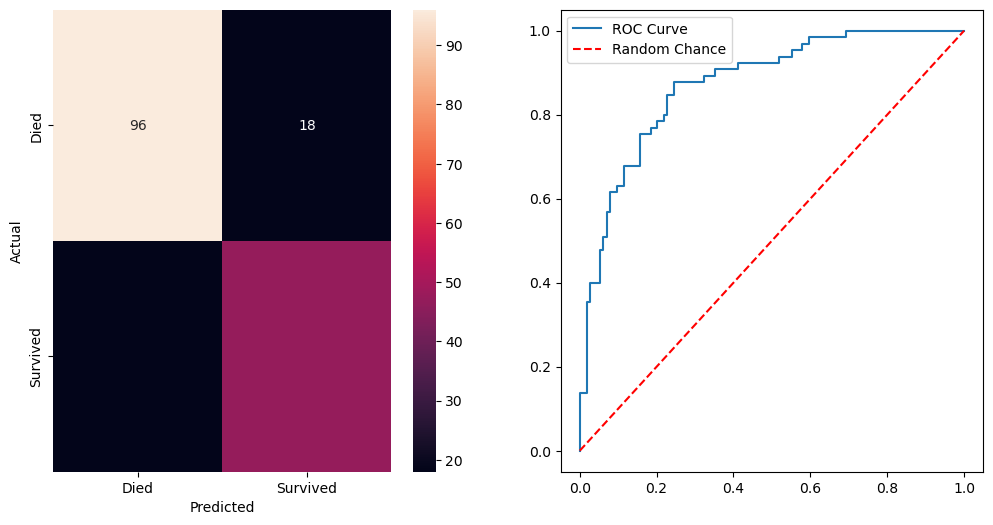

RandomForestClassifier accuracy: 86.03%
RandomForestClassifier ROC-AUC: 0.88


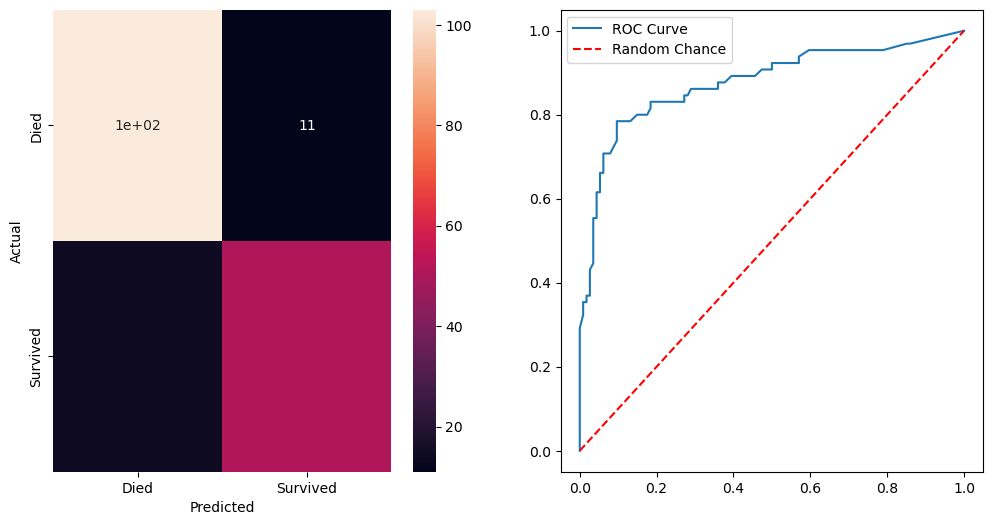

XGBClassifier accuracy: 83.24%
XGBClassifier ROC-AUC: 0.87


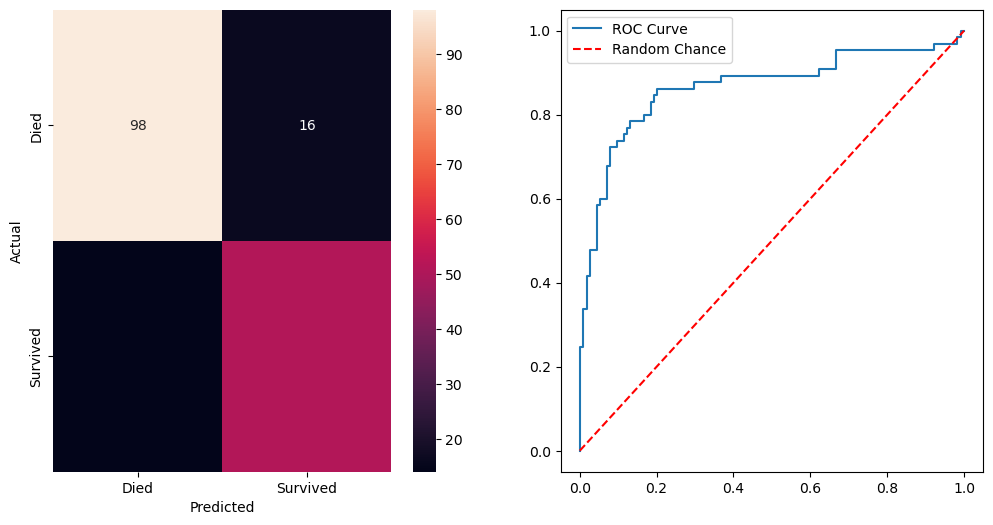

GaussianNB accuracy: 66.48%
GaussianNB ROC-AUC: 0.83


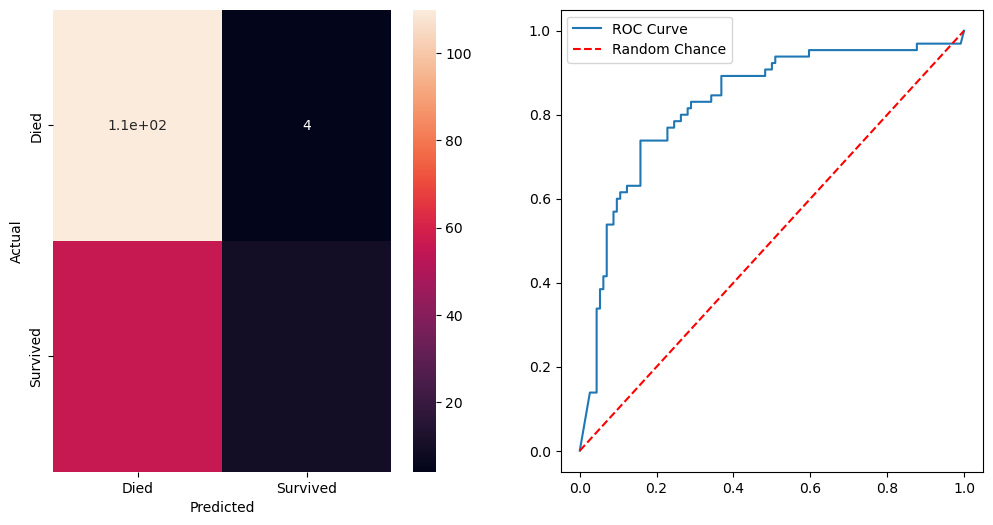

SVC accuracy: 68.72%
SVC ROC-AUC: 0.74


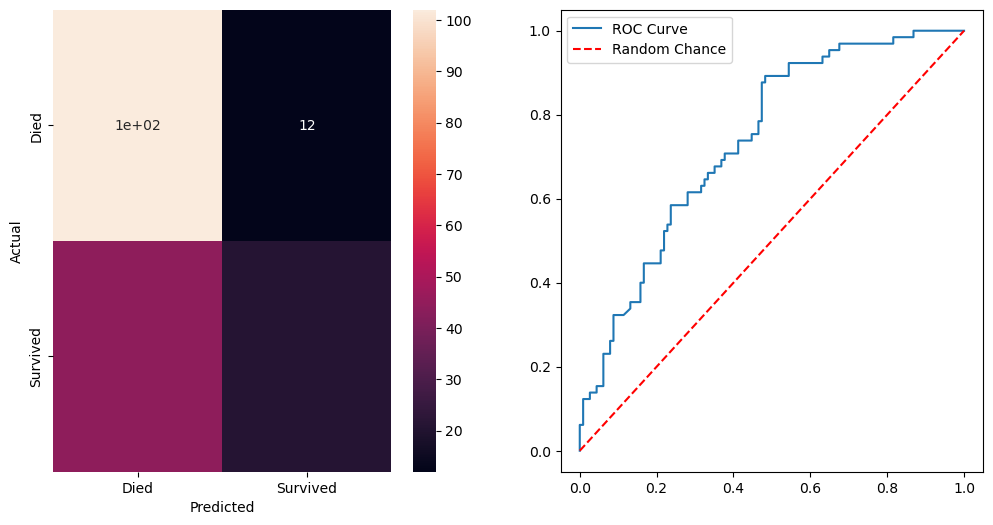

In [69]:
for _, m in naive_metrics.items():
    m.display()

,Accuracy,ROC_AUC,Name
1,0.860335,0.876721,RandomForestClassifier
2,0.832402,0.865047,XGBClassifier
0,0.798883,0.872874,LogisticRegression
4,0.687151,0.737652,SVC
3,0.664804,0.828138,GaussianNB


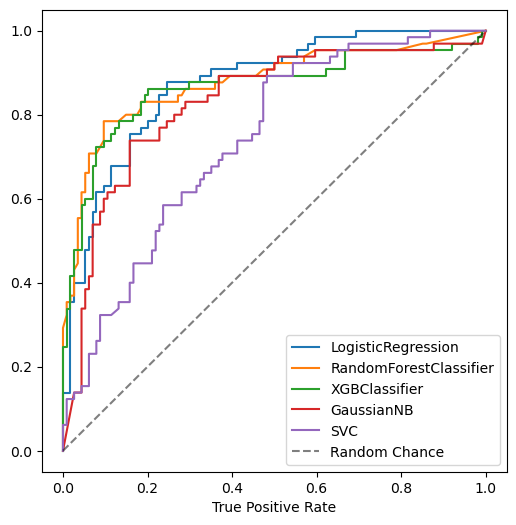

In [70]:
ModelMetrics.display_all(naive_metrics)

In [71]:
# Which model should we select?

# Your Turn!
Your goal is to *beat* the performance of the best model above by engineering new features. 

First we will perform an exploratory data analysis (EDA) to gain an intuition as to which features may be useful

We will first download the [*Starship Titantic*](https://www.kaggle.com/competitions/spaceship-titanic/data) Dataset from kaggle. It is similar to the original Titantic dataset and
we will use it to illustrate some of the transformations we will be using

NOTE: You must join competition to download this dataset!

### Data Ingestion

In [72]:
# Can also manually download and load
fname = "spaceship-titanic"
get_kaggle_comp(fname, _DATA_PATH/"space")
unzip_file(_DATA_PATH/"space", fname+".zip")

In [73]:
space_df = pd.read_csv(_DATA_PATH / "space" / "train.csv", index_col='PassengerId')
space_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [74]:
# Let's also reload the original data and use the same train/test split
df = pd.read_csv(_DATA_PATH/"train.csv", index_col="PassengerId")
train_df = df.iloc[train_indices].copy()
test_df = df.iloc[test_indices].copy()

# Now we have train_df and test_df that you will be using. 
# We will demo transformations with space_df

### Exploratory Data Analysis
EDA is useful to help us find trends and inter-feature relationships. We will use information we learn during EDA to better inform our missing data imputation and feature engineering

In [75]:
train_df.isna().sum().sort_values(ascending=False)

Cabin       554
Age         144
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [76]:
# Recall that we had to fill missing values in Cabin, Age, and Embarked
# Was there a better way to do this? let's look for correlations

In [77]:
space_df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')

c:\Users\SUDARSHAN\anaconda3\envs\ensf-ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

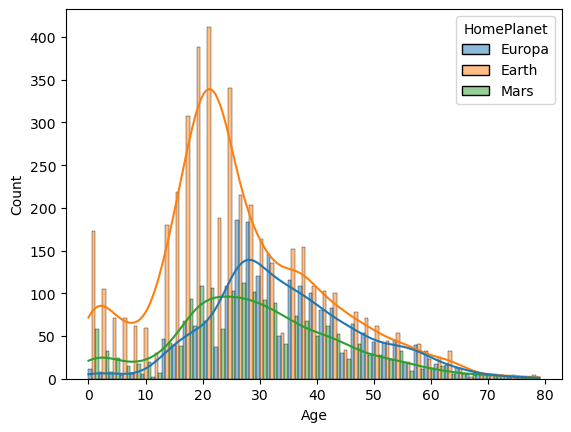

In [78]:
# SPACESHIP TITANIC EXAMPLE
# Plot histogram of age with hue set to "HomePlanet", kde=True, and multiple="dodge"
# What can we say about the distributions of ages? Are they correlated with HomePlanet?

sns.histplot(space_df, x="Age", kde=True, hue="HomePlanet", multiple="dodge")

*What can we say about the distributions of ages? Are they correlated with HomePlanet?*

If the distributions overlap significantly, it might suggest that age is not strongly correlated with the home planet. But, since there are clear separations or differences in the peaks of the distributions, it could be concluded that there is a potential correlation between age and the home planet.

In [85]:
# TODO: Plot histogram (sns.histplot) of Age with hue set to Pclass, kde=True, and multiple='dodge'
plt.figure(figsize=(10, 6))
sns.histplot(space_df, x="Age", kde=True, hue="Pclass", multiple="dodge")
plt.title("Distribution of Ages by Pclass")
plt.show()
# What can we conclude? Can we fill the ages in a more sensible manner?

ValueError: Could not interpret value `Pclass` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

In [80]:
# Next up is Cabin!
#Let's see unique values:
train_df['Cabin'].unique()

array([nan, 'D47', 'C123', 'D28', 'D19', 'C110', 'A6', 'D48', 'B69',
       'B96 B98', 'E68', 'B58 B60', 'E77', 'D20', 'B57 B59 B63 B66',
       'C148', 'E49', 'B39', 'F33', 'E34', 'A7', 'D36', 'E36', 'D50',
       'C126', 'D', 'B49', 'E63', 'A31', 'C92', 'E25', 'C95', 'A5', 'D15',
       'D7', 'D17', 'B86', 'A20', 'B78', 'B30', 'D21', 'D10 D12', 'G6',
       'C124', 'B38', 'C52', 'C93', 'C45', 'B20', 'C82', 'C78', 'C106',
       'C22 C26', 'B28', 'C104', 'F2', 'D11', 'C86', 'E38', 'A34', 'C91',
       'C68', 'F G73', 'E46', 'E50', 'A32', 'C128', 'E10', 'E44', 'B41',
       'B18', 'D35', 'E31', 'C2', 'C50', 'C103', 'B3', 'A10', 'C49',
       'C90', 'B77', 'E33', 'B5', 'A19', 'B37', 'E58', 'C23 C25 C27',
       'C7', 'E67', 'E8', 'B22', 'B35', 'C125', 'C65', 'C54', 'B80',
       'B94', 'D26', 'E121', 'E24', 'D45', 'B101', 'B51 B53 B55', 'D46',
       'E17', 'B4', 'C46', 'A23', 'F4', 'C47', 'E101', 'C111', 'C101',
       'B82 B84', 'C70', 'C32', 'B102', 'B71', 'A36', 'D9', 'B50'],
      

In [81]:
# These are in the format <deck-letter><cabin-number>
# NOTE: we have some messy entries with multiple cabins, but these are rare
# Let's see if we can gain some understanding by examining relationships with the deck

In [82]:
# SPACESHIP TITANIC EXAMPLE
# Extract first letter of cabin and assign to new feature named "Deck"
space_df['Deck'] = space_df['Cabin'].apply(lambda x: x[0] if x is not np.NaN else x)
space_df[['Deck', 'Cabin']].head()

,Deck,Cabin
PassengerId,,
0001_01,B,B/0/P
0002_01,F,F/0/S
0003_01,A,A/0/S
0003_02,A,A/0/S
0004_01,F,F/1/S


In [83]:
# TODO: Your turn, don't forget test_df!

train_df[['Deck', 'Cabin']]

KeyError: "['Deck'] not in index"

<Axes: xlabel='Deck', ylabel='RoomService'>

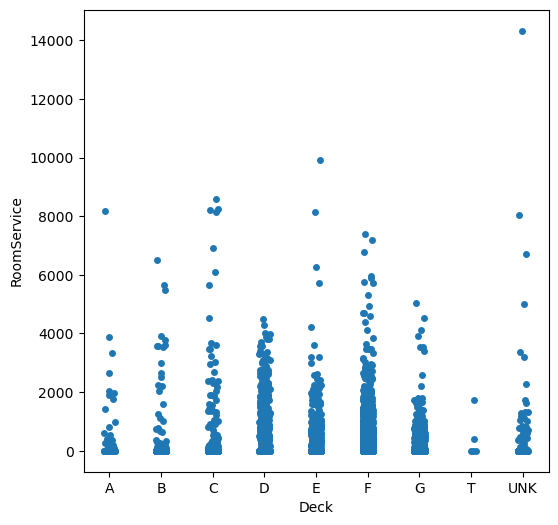

In [ ]:
# SPACESHIP TITANIC EXAMPLE
# Plot seaborn stripplot of RoomService vs. Deck. 
# Encoding missing values as UNK but do not overwrite original DataFrame yet
# NOTE: Sort values if you want to plot in ascending order
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(
    x=space_df.sort_values(by='Deck')['Deck'].fillna("UNK"),
    y=space_df.sort_values(by='Deck')['RoomService']
    )

<Axes: xlabel='Deck', ylabel='Fare'>

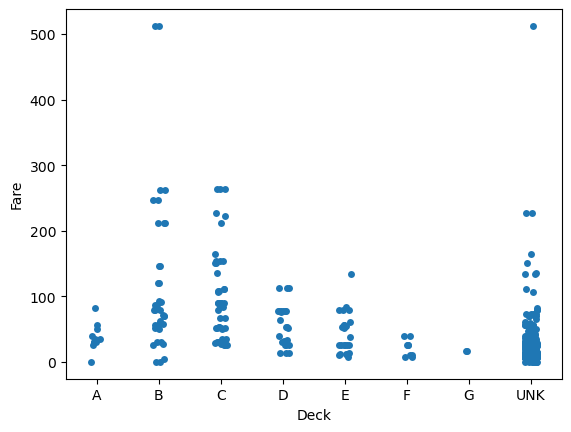

In [ ]:
# TODO: Plot stripplot plot of Fare vs. Deck


It seems that missing cabins are typically for lower fare passengers!
- This observation suggests that there may be a relationship between the fare and the deck (cabin) a passenger is assigned.

Perhaps we can use the mean fare on each deck to fill in the missing values!
- Find the nearest mean fare value for the corresponding deck and assigning that deck to the missing value.

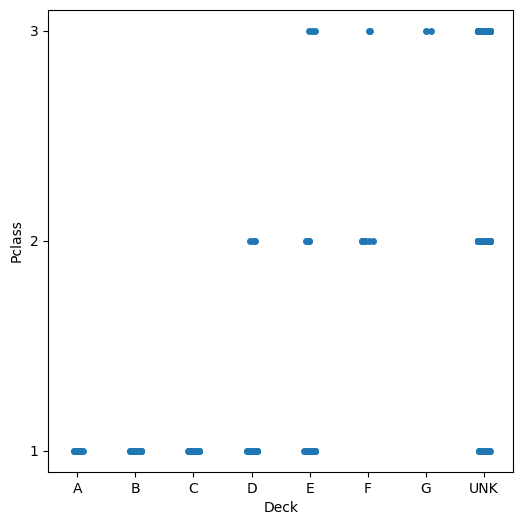

In [ ]:
# TODO: Let's try Pclass. Plot stripplot plot of Fare vs. Deck


No clear relationship here! What other relationships might we try? What about the name feature?

In [ ]:
# SPACESHIP TITANIC EXAMPLE
# Create new feature named "Surname"
# NOTE: If lambda is confusing you can also define a function to call!
space_df['Surname'] = space_df['Name'].str.split(" ").apply(lambda x: x if x is np.NaN else x[-1].strip())
space_df[['Name', 'Surname']].head()

,Name,Surname
PassengerId,,
0001_01,Maham Ofracculy,Ofracculy
0002_01,Juanna Vines,Vines
0003_01,Altark Susent,Susent
0003_02,Solam Susent,Susent
0004_01,Willy Santantines,Santantines


In [ ]:
train_df['Name'].head()

PassengerId
710    Moubarek, Master. Halim Gonios ("William George")
440               Kvillner, Mr. Johan Henrik Johannesson
841                          Alhomaki, Mr. Ilmari Rudolf
721                    Harper, Miss. Annie Jessie "Nina"
40                           Nicola-Yarred, Miss. Jamila
Name: Name, dtype: object

In [ ]:
# TODO: Create new feature named "Surname"
# NOTE: Surname is your dataset is first! How to modify the above?
# Hint: We need to split on a different delimiter!
# NOTE: don't forget test_df


train_df[['Name', 'Surname']].head()

,Name,Surname
PassengerId,,
710,"Moubarek, Master. Halim Gonios (""William George"")",Moubarek
440,"Kvillner, Mr. Johan Henrik Johannesson",Kvillner
841,"Alhomaki, Mr. Ilmari Rudolf",Alhomaki
721,"Harper, Miss. Annie Jessie ""Nina""",Harper
40,"Nicola-Yarred, Miss. Jamila",Nicola-Yarred


In [ ]:
# OPTIONAL: We can also see that the names include the titles of passengers 
# (Mr. Miss, etc.). However, these are harder to extract from Name string

# TODO: Create a new feature named "Title" similar to the above. 
# NOTE: Try using pd.Series.str.extract method with regex pattern r"([A-Z]*[a-z]*)\."
# NOTE: Regex101 is a great resource for testing your patterns: https://regex101.com/
# NOTE: Don't forget test_df

# extract(r"([A-Z]*[a-z]*)\.", expand=False): Uses a regular expression to extract substrings that start with an uppercase letter followed by zero or more lowercase letters, followed by a period.
# This pattern is commonly used for titles like "Mr.", "Mrs.", "Dr.", etc. 


train_df[['Name', 'Title']].head()

,Name,Title
PassengerId,,
710,"Moubarek, Master. Halim Gonios (""William George"")",Master
440,"Kvillner, Mr. Johan Henrik Johannesson",Mr
841,"Alhomaki, Mr. Ilmari Rudolf",Mr
721,"Harper, Miss. Annie Jessie ""Nina""",Miss
40,"Nicola-Yarred, Miss. Jamila",Miss


In [ ]:
### OPTIONAL: How to find cabins based on surname?

def fill_by_surname(df: pd.DataFrame, col: str)-> pd.DataFrame:
    """Fills values in feature `col` by using the first non-zero value that 
        matches on column 'Surname'

    Args:
        df (pd.DataFrame): Dataframe to fill missing values in
        col (str): Column in df to fill values in

    Returns:
        pd.DataFrame: Dataframe with values filled in column `col`
    """
    df = df.copy()
    original_nan_count = df[col].isna().sum()
    surnames = df.loc[df[col].isna()]['Surname'].unique()
    for s in surnames:
        family_cabin = df.loc[(df['Surname']==s) & (df[col].notna())][col]
        if  len(family_cabin)==0:
            continue
        else:
            cabin = family_cabin.iloc[0]
            df.loc[(df['Surname']==s), col] = df.loc[(df['Surname']==s), col].fillna(value=cabin)
    print(f"Filled {original_nan_count - df[col].isna().sum()} "
          f"missing values in column {col}"
          )
    return df

col = 'Cabin'
_ = fill_by_surname(train_df, col)
_ = fill_by_surname(test_df, col)

Filled 12 missing values in column Cabin
Filled 0 missing values in column Cabin


In [ ]:
# Reflection: 
# Consider how we could improve on the above to use training surnames to fill test set?
# What are the limitations of the above? Could some surnames be found in both train/test?
# Can we improve on the above by using a stateful transformer?
# Recall: Sklearn API's: https://scikit-learn.org/stable/developers/develop.html#apis-of-scikit-learn-objects

In [ ]:
# OPTIONAL: Developing custom transformers

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import  check_is_fitted
from typing import Callable, Optional

class MARImputer(TransformerMixin, BaseEstimator, auto_wrap_output_keys=None):
    """Fills missing-at-random values found in dep_feature using samples that match on corr_feature
    
    Args:
            corr_feature (str): Feature correlated with missing values. 
            dep_feature (str): Feature for which missing values will be filed by
                using samples that have the same value in corr_feature column.
            verbose (bool, optional): If True, print how many samples were 
                filled in .transform(). Defaults to True.
            copy (bool, optional): If True, copy df passed to .transform().
                Defaults to True.
                
    """
    def __init__(self,  corr_feature: str,
                 dep_feature: str,
                 verbose: bool = True,
                 copy: bool = True,
                 agg: Optional[Callable] = None
        ):
        super().__init__()
        self.corr_feature = corr_feature
        self.dep_feature = dep_feature
        self.verbose = verbose
        self.copy=copy
        if agg is None:
            self.agg = lambda x: x.iloc[0]  # Simply select first instance
        else:
            self.agg = agg

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None) -> MARImputer:
        self._reset()
        self.map_ = self._populate_mapping(X)
        return self
    
    def transform(self, X: pd.DataFrame, y: Optional[pd.Series] = None) -> pd.DataFrame:
        check_is_fitted(self)
        if self.copy:
            X = X.copy(deep=True)
        original_nan_count = X[self.dep_feature].isna().sum()
        X = self._transform(X, y)
        if self.verbose:
            print(f"Filled {original_nan_count - X[self.dep_feature].isna().sum()} "
                f"missing values in column {self.dep_feature}")
        return X
    
    def _transform(self, X, y)-> pd.DataFrame:
        for k,v in self.map_.items():
            X.loc[X[self.corr_feature]==k, self.dep_feature] = \
                X.loc[X[self.corr_feature]==k, self.dep_feature].fillna(value=v)
        return X
    
    def _reset(self) -> None:
        if hasattr(self, "map_"):
            del self.map_
        
    def _populate_mapping(self, X:pd.DataFrame) -> Dict[str, Any]:
        map = {}
        for f in X[self.corr_feature].unique():
            X_slice = X.loc[
                (X[self.corr_feature]==f) & (X[self.dep_feature].notna())
            ]
            if len(X_slice) == 0:
                continue
            else:
                map[f] = self.agg(X_slice[self.dep_feature])
        return map

                
cabin_filler = MARImputer(corr_feature="Surname", dep_feature="Cabin")
train_df = cabin_filler.fit_transform(train_df)
test_df = cabin_filler.transform(test_df)

Filled 12 missing values in column Cabin
Filled 3 missing values in column Cabin


### Data Preprocessing

In [ ]:
# Time to put it all together!
# Let's start with our improved missing value imputation
train_df.isna().sum().sort_values(ascending=False)

Deck        554
Cabin       542
Age         144
Embarked      2
Pclass        0
Survived      0
SibSp         0
Sex           0
Name          0
Parch         0
Fare          0
Ticket        0
Surname       0
Title         0
dtype: int64

In [ ]:
# TODO: We can fill a few more Deck values using our newly found Cabins. Simply run the same apply function as above:
# NOTE: Don't forget test!


train_df.isna().sum().sort_values(ascending=False)

Deck        542
Cabin       542
Age         144
Embarked      2
Pclass        0
Survived      0
SibSp         0
Sex           0
Name          0
Parch         0
Fare          0
Ticket        0
Surname       0
Title         0
dtype: int64

In [ ]:
# STARSHIP EXAMPLE
# Let's fill the remaining Cabin's with the UNK token:
space_df['Cabin'] = space_df['Cabin'].fillna(value="UNK")

In [ ]:
# TODO: Let's fill the remaining Cabin's with the UNK token:
# NOTE: Don't forget test


train_df.isna().sum().sort_values(ascending=False)

Deck        542
Age         144
Embarked      2
Name          0
Pclass        0
Survived      0
SibSp         0
Sex           0
Parch         0
Ticket        0
Cabin         0
Fare          0
Surname       0
Title         0
dtype: int64

In [ ]:
# The remaining decks we are going to fill using the the average Fare per deck by 
# extending our earlier defined class. 
# I will give transformer implementation
# TODO: Fit transform train_df, transform test_df, print missing values from train_df to confirm it worked

class MARImputerWithMean(MARImputer):
    """Fills missing-at-random values found in dep_feature by finding minimum distance to 
    mean values for each category of corr_feature.
    
    Args:
            corr_feature (str): Feature correlated with missing values. 
            dep_feature (str): Feature for which missing values will be filed by
                using samples that have the same value in corr_feature column.
            verbose (bool, optional): If True, print how many samples were 
                filled in .transform(). Defaults to True.
            copy (bool, optional): If True, copy df passed to .transform().
                Defaults to True.
    """
    def __init__(self,  corr_feature: str,
                 dep_feature: str,
                 verbose: bool = True,
                 copy: bool = True,
                ):
        super().__init__(corr_feature, dep_feature, verbose, copy)

    # override -> Available as decorator in py 3.12 from typing library
    def _transform(self, X: pd.DataFrame, y: Optional[pd.Series] = None) -> pd.DataFrame:
        X[self.dep_feature] = X.apply(self._nearest_corr_mean, axis=1)
        return X

    def _nearest_corr_mean(self, row: pd.Series)-> Any:
        if row[self.dep_feature] is not np.NaN:
            return row[self.dep_feature]  # No op
        distance_dict = {k: np.abs(row[self.corr_feature]-v) for k,v in self.map_.items()}
        # Select nearest corr_feature category with the smallest distance from average corr_feature on that deck to this sample Fare
        nearest_mean_cate = sorted(distance_dict.items(), key=lambda item:item[1], reverse=False)[0][0]
        return nearest_mean_cate

    # override
    def _populate_mapping(self, X:pd.DataFrame) -> Dict[str, Any]:
        # TODO: Reflection: why is it important to drop NaN in GroupBy?
        map = X.groupby(self.dep_feature, dropna=True)[self.corr_feature].mean().to_dict()
        return map

deck_imputer = MARImputerWithMean(corr_feature="Fare", dep_feature="Deck")
# Fit/transform here


train_df.isna().sum().sort_values(ascending=False)

Filled 542 missing values in column Deck
Filled 130 missing values in column Deck


Age         144
Embarked      2
Pclass        0
Name          0
Sex           0
Survived      0
SibSp         0
Parch         0
Fare          0
Ticket        0
Cabin         0
Deck          0
Surname       0
Title         0
dtype: int64

Filled 144 missing values in column Age
Filled 33 missing values in column Age


<Axes: xlabel='Age', ylabel='Count'>

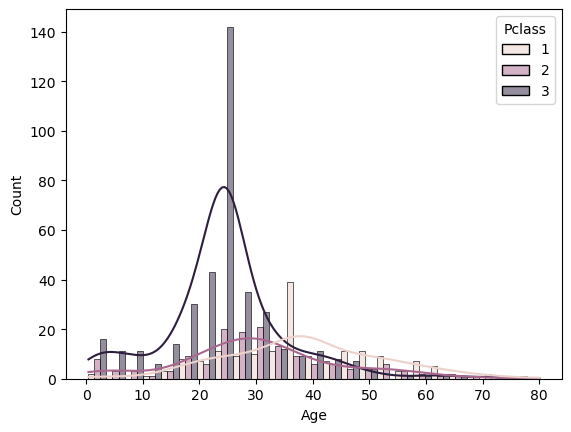

In [ ]:
# We can re-use the MarImputer transformer to fill missing ages based on the mean Age of each PClass! 
# TODO: Fit/transform train and test and plot histogram of age after transformation to compare with my results 

age_imputer = MARImputer(corr_feature="Pclass", dep_feature="Age", agg=pd.Series.mean)

In [ ]:
# TODO: For Embarked, we will simply fill with UNK token again
# TODO: Print missing values again to confirm we have successfully filled all NaNs

train_df.isna().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Deck        0
Surname     0
Title       0
dtype: int64

### Categorical Feature Encoding


In [ ]:
# Which remaining columns need encoding? Display all object type columns in train_df:
cols = ?
cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck', 'Surname', 'Title']

In [ ]:
# TODO: display number of unique values per column above


Name: 712
Sex: 2
Ticket: 562
Cabin: 121
Embarked: 4
Deck: 7
Surname: 553
Title: 16


In [ ]:
# TODO: Drop `Ticket`, "Surname", and `Name` columns from both dataframes. Display train_df shape


train_df.shape

(712, 11)

In [ ]:
# TODO: Reflection: Last time we concluded that none of these were ordinal features. What about Deck?

In [ ]:
# TODO: Encode all ['Sex', 'Cabin', 'Embarked', 'Title'] using ohe_encoding func we defined above. 
# NOTE: Recall function signature: ohe_encoding(train_df, ohe, cols)
# NOTE: don't forget to fit ohe to train_df[cols]
# NOTE: We need to set handle_unknown to 'ignore' since many cabins from test are not found in train
# TODO: Display new train_df_encoded shape
cols = ['Sex', 'Cabin', 'Embarked', 'Title']

train_df_encoded.shape

(712, 150)

In [ ]:
# TODO: Use OrdinalEncoder for Deck:
# NOTE: .fit expects shape of (n_samples, n_features). Can use df[[col]] syntax or ColumnTransformer
# NOTE: Some Decks in test not found in train, use 
# handle_unknown="use_encoded_value", unknown_value=-1 as arguments for Ordinal encoder
# TODO: display train_df_encoded["Deck"]

categories = [np.sort(train_df_encoded['Deck'].unique())]
# Your code here

train_df_encoded["Deck"]

PassengerId
710    6
440    6
841    6
721    0
40     6
      ..
506    2
640    6
879    6
825    4
804    6
Name: Deck, Length: 712, dtype: int8

### Feature Engineering

In [ ]:
# Let's create a binary feature called "has_family" that is true if parch OR sibsp >1

# SPACESHIP EXAMPLE
# NOTE: Can be done in a single line with lambda

def spent_money(row):
    cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    if row[cols].sum()>1:
        return True
    else:
        return False
    
space_df['spent_money'] = space_df.apply(spent_money, axis=1)
space_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'spent_money']]

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,spent_money
PassengerId,,,,,,
0001_01,0.0,0.0,0.0,0.0,0.0,False
0002_01,109.0,9.0,25.0,549.0,44.0,True
0003_01,43.0,3576.0,0.0,6715.0,49.0,True
0003_02,0.0,1283.0,371.0,3329.0,193.0,True
0004_01,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...
9276_01,0.0,6819.0,0.0,1643.0,74.0,True
9278_01,0.0,0.0,0.0,0.0,0.0,False
9279_01,0.0,0.0,1872.0,1.0,0.0,True


In [ ]:
# TODO: Let's create a binary feature called "has_family" that is true if Parch OR SibSp >1
# NOTE: Don't forget test_df_encoded 
# TODO: display train_df_encoded[['Parch', 'SibSp', 'has_family']]


train_df_encoded[['Parch', 'SibSp', 'has_family']]

,Parch,SibSp,has_family
PassengerId,,,
710,1,1,True
440,0,0,False
841,0,0,False
721,1,0,True
40,0,1,True
...,...,...,...
506,0,1,True
640,0,1,True
879,0,0,False


### Modelling and scaling

In [ ]:
# Split data
X_train = train_df_encoded.drop(columns=["Survived"])
y_train = train_df_encoded["Survived"]
X_test = test_df_encoded.drop(columns=["Survived"])
y_test = test_df_encoded["Survived"]

In [ ]:
# Final step! Let's try using a standard scaler fit to train_df_encoded
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Deck,Sex_female,Sex_male,Cabin_A10,Cabin_A19,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.313202,29.087701,0.519663,0.411517,33.001761,4.469101,0.355337,0.644663,0.001404,0.001404,...,0.002809,0.049157,0.199438,0.002809,0.001404,0.568820,0.147472,0.001404,0.008427,0.001404
std,0.832832,13.587005,1.078967,0.833903,52.353275,2.043590,0.478952,0.478952,0.037477,0.037477,...,0.052963,0.216348,0.399859,0.052963,0.037477,0.495589,0.354825,0.037477,0.091475,0.037477
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.925000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,25.000000,0.000000,0.000000,14.500000,6.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,36.625000,1.000000,1.000000,31.068750,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## STARSHIP EXAMPLE
# Use standard scale to fit/transform X_train and transform X_test for the following columns:
# cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck']
# Can wrap with columnTransformer or make a slice as per above
ss = StandardScaler().set_output(transform="pandas")
space_df_copy = space_df.copy()
space_df_copy[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa"]] = ss.fit_transform(space_df[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa"]])
display(space_df_copy[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa"]])
#
# OR
#
from sklearn.compose import ColumnTransformer
ss = ColumnTransformer(
    transformers=[("ss", StandardScaler(), ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa"])],
)
space_df_copy[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa"]]=ss.fit_transform(space_df)
display(space_df_copy[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa"]])

,Age,RoomService,FoodCourt,ShoppingMall,Spa
PassengerId,,,,,
0001_01,0.702095,-0.337025,-0.284274,-0.287317,-0.273736
0002_01,-0.333233,-0.173528,-0.278689,-0.245971,0.209267
0003_01,2.013510,-0.272527,1.934922,-0.287317,5.634034
0003_02,0.287964,-0.337025,0.511931,0.326250,2.655075
0004_01,-0.885407,0.117466,-0.240833,-0.037590,0.223344
...,...,...,...,...,...
9276_01,0.840138,-0.337025,3.947464,-0.287317,1.171754
9278_01,-0.747364,-0.337025,-0.284274,-0.287317,-0.273736
9279_01,-0.195189,-0.337025,-0.284274,2.808634,-0.272856


,Age,RoomService,FoodCourt,ShoppingMall,Spa
PassengerId,,,,,
0001_01,0.702095,-0.337025,-0.284274,-0.287317,-0.273736
0002_01,-0.333233,-0.173528,-0.278689,-0.245971,0.209267
0003_01,2.013510,-0.272527,1.934922,-0.287317,5.634034
0003_02,0.287964,-0.337025,0.511931,0.326250,2.655075
0004_01,-0.885407,0.117466,-0.240833,-0.037590,0.223344
...,...,...,...,...,...
9276_01,0.840138,-0.337025,3.947464,-0.287317,1.171754
9278_01,-0.747364,-0.337025,-0.284274,-0.287317,-0.273736
9279_01,-0.195189,-0.337025,-0.284274,2.808634,-0.272856


In [ ]:
# TODO: Use standard scale to fit/transform X_train and transform X_test for the following columns:
# cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck']
# Can wrap with columnTransformer or make a slice as per above
# TODO: Call .describe on X_train

ss = StandardScaler().set_output(transform="pandas")
# Your code here
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Deck,Sex_female,Sex_male,Cabin_A10,Cabin_A19,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,1.995907e-17,4.490790e-17,-9.979533e-18,1.995907e-17,6.237208e-17,2.744372e-17,0.355337,0.644663,0.001404,0.001404,...,0.002809,0.049157,0.199438,0.002809,0.001404,0.568820,0.147472,0.001404,0.008427,0.001404
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,0.478952,0.478952,0.037477,0.037477,...,0.052963,0.216348,0.399859,0.052963,0.037477,0.495589,0.354825,0.037477,0.091475,0.037477
min,-1.577900e+00,-2.111419e+00,-4.819686e-01,-4.938297e-01,-6.308098e-01,-2.188425e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.763334e-01,-5.220196e-01,-4.819686e-01,-4.938297e-01,-4.793280e-01,-7.193880e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.252333e-01,-3.010652e-01,-4.819686e-01,-4.938297e-01,-3.536506e-01,7.496490e-01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.252333e-01,5.551332e-01,4.454953e-01,7.061933e-01,-3.694840e-02,7.496490e-01,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,8.252333e-01,3.749766e+00,6.937743e+00,6.706308e+00,9.162071e+00,7.496490e-01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Get models by calling get_models_dict
models_dict = get_models_dict()

In [ ]:
# Fit and evaluate models using fit_validate_model()

data = [X_train, X_test, y_train, y_test]
engineered_metrics = {}
for name, model in models_dict.items():
    engineered_metrics[name] = fit_validate_model(model, name, *data)

,Accuracy,ROC_AUC,Name
1,0.843575,0.881916,RandomForestClassifier
0,0.837989,0.896896,LogisticRegression
2,0.832402,0.875843,XGBClassifier
4,0.821229,0.902294,SVC
3,0.659218,0.833131,GaussianNB


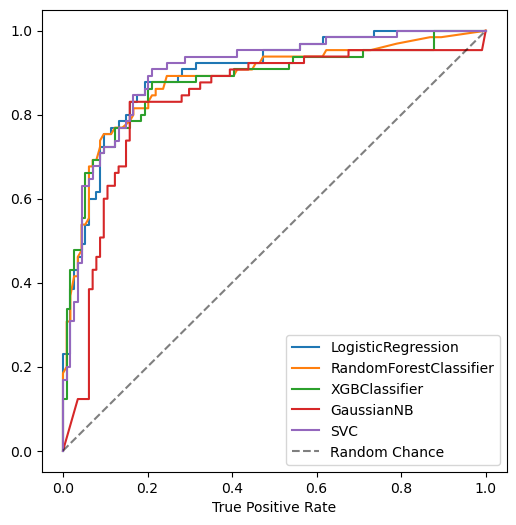

In [ ]:
# Display all metrics using `ModelMetrics.display_all``
ModelMetrics.display_all(engineered_metrics)

,Accuracy,ROC_AUC,Name
1,0.860335,0.876721,RandomForestClassifier_naive
6,0.843575,0.881916,RandomForestClassifier
5,0.837989,0.896896,LogisticRegression
7,0.832402,0.875843,XGBClassifier
2,0.826816,0.863698,XGBClassifier_naive
9,0.821229,0.902294,SVC
0,0.804469,0.871255,LogisticRegression_naive
4,0.687151,0.737652,SVC_naive
3,0.664804,0.828138,GaussianNB_naive
8,0.659218,0.833131,GaussianNB


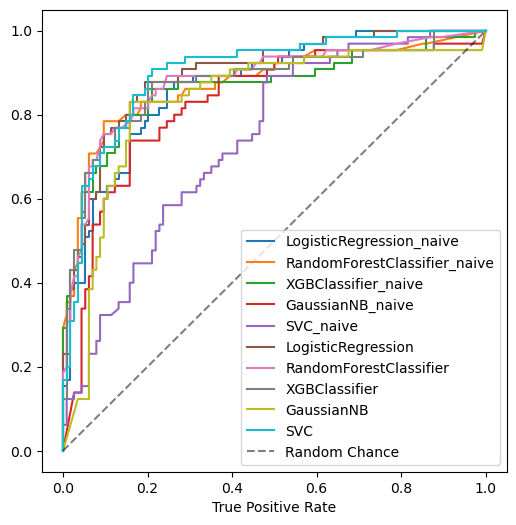

In [ ]:
### Compare naive vs. engineered_metrics by joining dict and calling display_all on merged metrics. 

combined_metrics = {f"{k}_naive": v for k,v in naive_metrics.items()}
for v in combined_metrics.values():
    v.name = v.name + "_naive"
combined_metrics.update(engineered_metrics)
ModelMetrics.display_all(combined_metrics)

# Reflection

* Which models improved? Which stayed the same or got worse? Which models improved the most? Why?
* How to explain models with improved ROC but worse accuracy?
* Why do RF and XGB metrics remain relatively unchanged?
* Is it possible that some missing values are Missing Not at Random (MNAR)?
* Would including Surname help? What will happen to dimensionality of training datset? Try it out! 
* Could other scalers help? Try PowerTransformer instead of StandardScaler!
* What other features could we try?
* Kaggle has a reserved test set that is provided without labels, which model do you think will perform best?

# Bonus: Pipelines, ColumnTransformer, and FunctionTransformers
### Steps to transform data:
1. Load train and test again from csv. This time, we will use test.csv!
2. Split data into X,y tuples
3. Extract Surname from Name
4. Extract Title from Name
5. Fill missing Cabin values based on Surname
6. Extract Deck letter from Cabin
7. Fill missing deck letters based on average Fare per deck
8. Fill missing age values based on average age per Pclass
9. Drop `Ticket`, "Surname", and `Name` features
10. Engineer has_family feature based on Parch and SibSp
11. Fill any missing data at this point with -1 or UNK depending on dtype of feature
12. Encode categorical data with one-hot encoding, except Deck
13. Encode Deck with ordinalEncoder
14. Scale train and test with standard scaler
15. Fit on training data with models and obtain predictions to submit to Kaggle


Next week we will discuss these concepts in further detail

In [ ]:
# Optional BONUS: How to package up these transformations for using on unseen data? Pipelines!
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# Note that we can use FunctionTransformer to turn an arbitrary stateless 
# function into a class that conforms to Transformer API

# Step 1: 
train_df = pd.read_csv(_DATA_PATH/"train.csv", index_col="PassengerId")
test_df = pd.read_csv(_DATA_PATH/"test.csv", index_col="PassengerId")

# Step 2:
X_train, y_train = train_df.drop(columns=["Survived"]), train_df['Survived']
X_test = test_df

# Step 3
def get_surname(X: pd.DataFrame, y: Optional[pd.Series]=None)->pd.DataFrame:
    X['Surname'] = X['Name'].str.split(",").apply(lambda x: x if x is np.NaN else x[0].strip())
    return X

surname_t = FunctionTransformer(get_surname)

# Step 4
def get_title(X: pd.DataFrame, y: Optional[pd.Series]=None)->pd.DataFrame:
    X['Title'] = X['Name'].str.extract(r"([A-Z]*[a-z]*)\.", expand=False)
    return X

title_t = FunctionTransformer(get_title)

# Step 5
cabin_imputer = MARImputer(corr_feature="Surname", dep_feature="Cabin")

# Step 6
def get_deck(X: pd.DataFrame, y: Optional[pd.Series]=None)->pd.DataFrame:
    X['Deck'] = X['Cabin'].apply(lambda x: x[0] if x is not np.NaN else x)
    return X

deck_t = FunctionTransformer(get_deck)

# Step 7
deck_imputer = MARImputerWithMean(corr_feature="Fare", dep_feature="Deck")

# Step 8
age_imputer = MARImputer(corr_feature="Pclass", dep_feature="Age", agg=pd.Series.mean)

# Step 9
def feature_dropper(X: pd.DataFrame, y: Optional[pd.Series]=None, features: Optional[List]=None)->pd.DataFrame:
    if features is None:
        return X
    else:
        return X.drop(columns=features)

feature_dropper_t = FunctionTransformer(feature_dropper, kw_args={"features": ["Ticket", "Name", "Surname"]})

# Step 10
def get_family(X: pd.DataFrame, y: Optional[pd.Series]=None)->pd.DataFrame:
    X['has_family'] = X.apply(lambda row: True if row[["Parch", "SibSp"]].sum()>0 else False, axis=1)
    return X

family_t = FunctionTransformer(get_family)

# Step 11
cabin_filler = ColumnTransformer(
    transformers=[(
        "cabin_filler",
        SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value="UNK"),
        ["Cabin"]
        )
    ],
    remainder="passthrough",  # Do not drop other columns!
    verbose_feature_names_out = False,  # Do not prefix other columns with remainder_

).set_output(transform='pandas')

# Step 12
ohe = ColumnTransformer(
    transformers=[
        ("ohe",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=np.int8).set_output(transform="pandas"),
         ['Sex', 'Cabin', 'Embarked', 'Title'],
        )
    ],
    remainder="passthrough",  # Do not drop other columns!
    verbose_feature_names_out = False,  # Do not prefix other columns with remainder_
).set_output(transform='pandas')

# Step 13
categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
deck_encoder = ColumnTransformer(
    transformers = [
        ("ordinal_enc", 
         OrdinalEncoder(categories=categories, handle_unknown="use_encoded_value", unknown_value=-1, dtype=np.int8),
         ["Deck"]
        )
    ],
    remainder="passthrough",  # Do not drop other columns!
    verbose_feature_names_out = False,  # Do not prefix other columns with remainder_

).set_output(transform='pandas')

from sklearn.impute import SimpleImputer

# Step 14
ss = ColumnTransformer(
    transformers = [
        ("ss",
        StandardScaler().set_output(transform="pandas"),
        ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck'],
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out = False,  # Do not prefix other columns with remainder_
).set_output(transform='pandas')

In [ ]:
# Define the pipeline:
pipe = Pipeline(
    steps = [
        ("surname_t", surname_t),
        ("title_t", title_t),
        ("cabin_imputer", cabin_imputer),
        ("deck_t", deck_t),
        ("deck_imputer", deck_imputer),
        ("age_imputer", age_imputer),
        ("feature_dropper_t", feature_dropper_t),
        ("family_t", family_t),
        ("cabin_filler", cabin_filler),
        ("ohe", ohe),
        ("deck_encoder", deck_encoder),
        ("ss", ss),
        # Optionally can include an estimator here too!
    ]
)
# Fit pipeline and transform X_train
X_train_t = pipe.fit_transform(X_train, y_train)
X_train_t.head()

Filled 20 missing values in column Cabin
Filled 667 missing values in column Deck
Filled 177 missing values in column Age


,Pclass,Age,SibSp,Parch,Fare,Deck,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,has_family
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.827377,-0.552360,0.432793,-0.473674,-0.502445,0.740164,0,1,0,0,...,0,0,0,0,1,0,0,0,0,True
2,-1.566107,0.659475,0.432793,-0.473674,0.786845,-1.113628,1,0,0,0,...,0,0,0,0,0,1,0,0,0,True
3,0.827377,-0.249401,-0.474545,-0.473674,-0.488854,0.740164,1,0,0,0,...,0,1,0,0,0,0,0,0,0,False
4,-1.566107,0.432256,0.432793,-0.473674,0.420730,-1.113628,1,0,0,0,...,0,0,0,0,0,1,0,0,0,True
5,0.827377,0.432256,-0.474545,-0.473674,-0.486337,-1.577076,0,1,0,0,...,0,0,0,0,1,0,0,0,0,False


In [ ]:
X_test_t = pipe.transform(X_test)

Filled 9 missing values in column Cabin
Filled 318 missing values in column Deck
Filled 86 missing values in column Age


In [ ]:
rf = RandomForestClassifier(random_state=_RANDOM_STATE)
rf.fit(X_train_t, y_train)
y_pred=rf.predict(X_test_t)

In [ ]:
y_pred = pd.Series(y_pred, index=X_test.index, name='Survived')
y_pred

PassengerId
892     0
893     0
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64

In [ ]:
# Save local copy and check results on Kaggle!
y_pred.to_csv(_DATA_PATH/"pred.csv") # Scored 75.8% on test set